In [106]:
import numpy as np
import pandas as pd
import re #regular expression
import os
import csv

import matplotlib.pyplot as plt

import librosa
from tqdm import tqdm


In [107]:
JIM_DATASET = "csv/clean_data_corpus_multicol.csv"

In [108]:
df = pd.read_csv(JIM_DATASET)
df.loc[df['gender'] == 'Transgender male', 'gender'] = 'Other'
df.loc[df['gender'] == 'Transgender female', 'gender'] = 'Other'
df.loc[df['gender'] == 'Prefer not to answer', 'gender'] = 'Other'

for j  in tqdm(range(1, len(df.columns[2:-6]))):
    for i in range(0, len(df)):
        df.iloc[i,j] = 'clean_audio/clean'+ str(df.iloc[i,j])

# drop columns 'response45' and 'response47'. These are not the voice of the speaker (it recorded voice)
#df = df.drop(['response45', 'response47'], axis=1)



100%|██████████| 48/48 [00:24<00:00,  1.95it/s]


### Sleepiness degree distribution

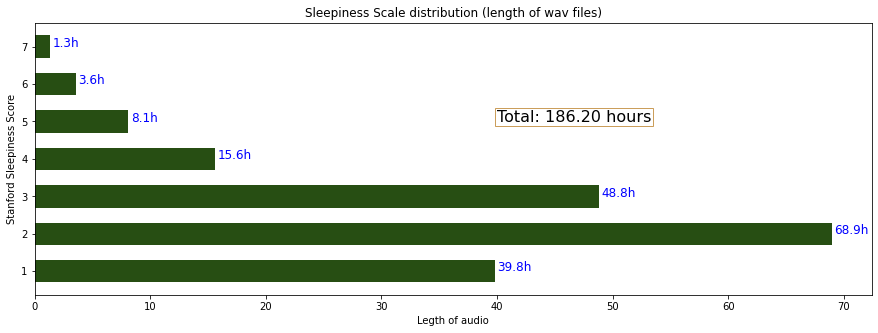

In [4]:
# SSS distrubtion
sleepy_classes = list(np.unique(df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = df.groupby(['sss'])['total_duration'].sum()/3600

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Sleepiness Scale distribution (length of wav files)', y=1)
ax.barh(sleepy_classes, sleepy_dist, 0.6, color='#274e13')
ax.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")
for i, length in enumerate(sleepy_dist):
    plt.text(y=i+1, x=length+.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')


plt.text(40, 5,f'Total: %.2f hours'%sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))
plt.show()

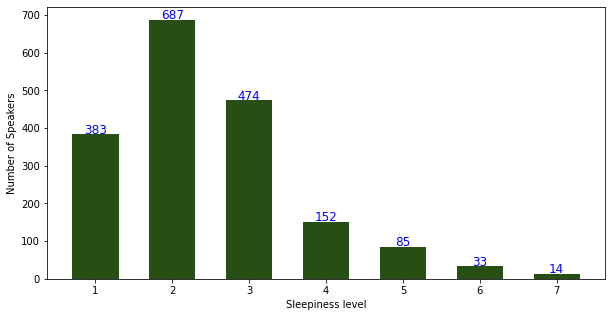

In [161]:
# SSS distrubtion
sleepy_classes = list(np.unique(df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = df.groupby(['sss'])['session_id'].count()

fig, ax = plt.subplots(figsize=(10, 5))
#ax.set_title('Sleepiness distribution', y=1)
ax.bar(sleepy_classes, sleepy_dist,  0.6, color='#274e13')
ax.set(ylabel="Number of Speakers", xlabel="Sleepiness level")


for i, length in enumerate(sleepy_dist):
    plt.text(x=i+1, y=length+2 , s=f'%d'%length , fontdict=dict(fontsize=12), color='blue', ha='center')
plt.show()



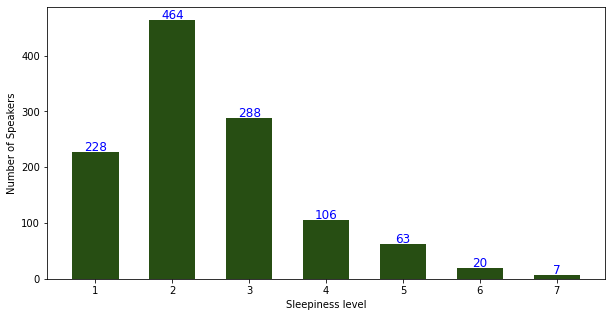

In [170]:
##### calculate for female distribution
female_df = df[df.gender=='Female']
sleepy_classes = list(np.unique(female_df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = female_df.groupby(['sss'])['session_id'].count()

fig, ax = plt.subplots(figsize=(10, 5))
#ax.set_title('Sleepiness distribution', y=1)
ax.bar(sleepy_classes, sleepy_dist,  0.6, color='#274e13')
ax.set(ylabel="Number of Speakers", xlabel="Sleepiness level")


for i, length in enumerate(sleepy_dist):
    plt.text(x=i+1, y=length+2 , s=f'%d'%length , fontdict=dict(fontsize=12), color='blue', ha='center')
plt.show()


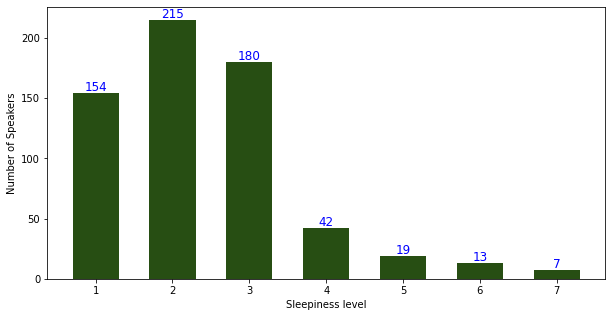

In [178]:
##### calculate for MALE distribution
male_df = df[df.gender=='Male']
sleepy_classes = list(np.unique(female_df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = male_df.groupby(['sss'])['session_id'].count()



fig, ax = plt.subplots(figsize=(10, 5))
#ax.set_title('Sleepiness distribution', y=1)
ax.bar(sleepy_classes, sleepy_dist,  0.6, color='#274e13')
ax.set(ylabel="Number of Speakers", xlabel="Sleepiness level")


for i, length in enumerate(sleepy_dist):
    plt.text(x=i+1, y=length+2 , s=f'%d'%length , fontdict=dict(fontsize=12), color='blue', ha='center')
plt.show()

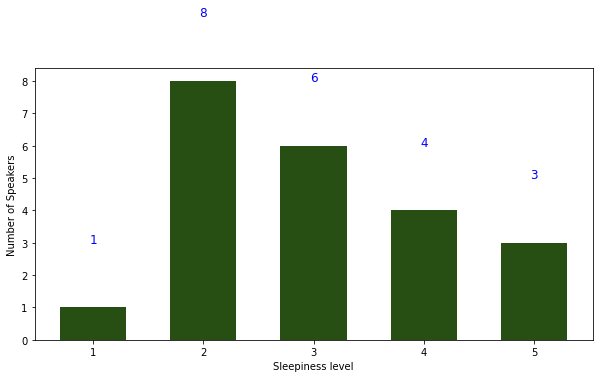

In [183]:
##### calculate for MALE distribution
other_df = df[df.gender=='Other']
sleepy_classes = list(np.unique(other_df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = other_df.groupby(['sss'])['session_id'].count()




fig, ax = plt.subplots(figsize=(10, 5))
#ax.set_title('Sleepiness distribution', y=1)
ax.bar(sleepy_classes, sleepy_dist,  0.6, color='#274e13')
ax.set(ylabel="Number of Speakers", xlabel="Sleepiness level")


for i, length in enumerate(sleepy_dist):
    plt.text(x=i+1, y=length+2 , s=f'%d'%length , fontdict=dict(fontsize=12), color='blue', ha='center')
plt.show()

### Gender distribution

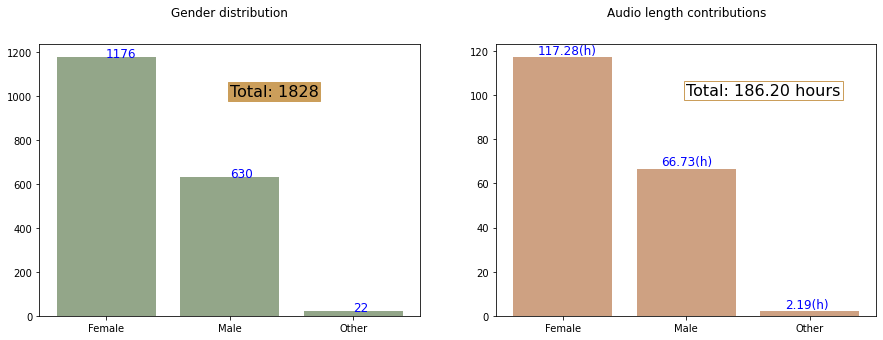

Female distribution: Non-sleepy:980 / Sleepy:196
Male distribution: Non-sleepy:549 / Sleepy:81


In [19]:
# Gender distribution
gender_classes = list(np.unique(df.gender))
gender_dist = df.groupby(['gender'])['session_id'].count()

fig= plt.figure(figsize=(15, 5))

# number of participants
ax1 = plt.subplot(121)
ax1.set_title('Gender distribution', y=1.08)
ax1.bar(gender_classes, gender_dist, color="#93a689")
for sex, count in enumerate(gender_dist):
    plt.text(x=sex, y=count+.5, s=f'%d'%count , fontdict=dict(fontsize=12), color='blue')
ax1.text(1,1000,f'Total: %.d'%gender_dist.sum(),\
         bbox={'facecolor':'#cb9e5a','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# length of audio for each gender
gender_wav_length_dist = df.groupby(['gender'])['total_duration'].sum()/3600
ax2 = plt.subplot(122)
ax2.set_title('Audio length contributions', y=1.08)
ax2.bar(gender_classes, gender_wav_length_dist, color="#cea182")
for sex, length in enumerate(gender_wav_length_dist):
    plt.text(x=sex-.2, y=length+1.5, s=f'%.2f(h)'%length , fontdict=dict(fontsize=12), color='blue')
ax2.text(1, 100,f'Total: %.2f hours'%sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))
plt.show()



# distribution in each gender
df_female = df[df.gender=='Female']
female_sleepy_dist = df_female.groupby(['sss'])['session_id'].count()

sleepy = 0
non_sleepy = 0
for i, num in enumerate(female_sleepy_dist):
    if i < 3: 
        non_sleepy += num
    else:
        sleepy += num
        
# print(female_sleepy_dist)
print('Female distribution: Non-sleepy:{} / Sleepy:{}'.format(non_sleepy, sleepy))

df_male = df[df.gender=='Male']
male_sleepy_dist = df_male.groupby(['sss'])['session_id'].count()
sleepy = 0
non_sleepy = 0
for i, num in enumerate(male_sleepy_dist):
    if i < 3: 
        non_sleepy += num
    else:
        sleepy += num
print('Male distribution: Non-sleepy:{} / Sleepy:{}'.format(non_sleepy, sleepy))



### Gender - Sleepiness Degree distribution

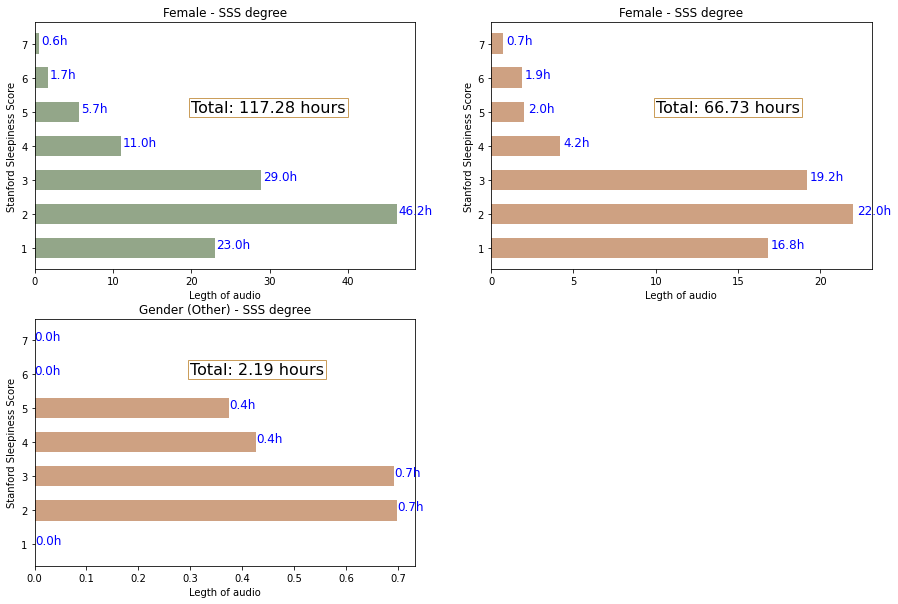

In [6]:
fig= plt.figure(figsize=(15, 10))

# sleepiness among females
df_female = df[df.gender=='Female']
# female_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_female.sss))))
female_sleepy_classes = list(np.unique(df_female.sss))
female_sleepy_dist = df_female.groupby(['sss'])['total_duration'].sum()/3600

ax1 = plt.subplot(221)
ax1.set_title('Female - SSS degree', y=1)
ax1.barh(female_sleepy_classes, female_sleepy_dist, 0.6, color='#93a689')
ax1.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")

for i, length in enumerate(female_sleepy_dist):
    plt.text(y=i+1, x=length+0.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax1.text(20, 5,f'Total: %.2f hours'%female_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# sleepiness among MALES
df_male = df[df.gender=='Male']
# male_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_male.sss))))
male_sleepy_classes = list(np.unique(df_male.sss))
male_sleepy_dist = df_male.groupby(['sss'])['total_duration'].sum()/3600
ax2 = plt.subplot(222)
ax2.set_title('Female - SSS degree', y=1)
ax2.barh(male_sleepy_classes, male_sleepy_dist, 0.6, color='#cea182')
ax2.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")
for i, length in enumerate(male_sleepy_dist):
    plt.text(y=i+1, x=length+0.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax2.text(10, 5,f'Total: %.2f hours'%male_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# sleepiness among OTHER gender
df_other_gender = df[df.gender=='Other']
# other_gender_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_other_gender.sss))))
other_gender_sleepy_classes = list(np.unique(df_other_gender.sss))
other_gender_sleepy_classes.append(6)
other_gender_sleepy_classes.append(7)
other_gender_sleepy_dist = df_other_gender.groupby(['sss'])['total_duration'].sum()/3600
other_gender_sleepy_dist['6'] = 0
other_gender_sleepy_dist['7'] = 0
ax3 = plt.subplot(223)
ax3.set_title('Gender (Other) - SSS degree', y=1)
ax3.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")

# ax3.barh(other_gender_sleepy_classes, other_gender_sleepy_dist, 0.6, color='#cea182')
ax3.barh(other_gender_sleepy_classes, other_gender_sleepy_dist, 0.6, color='#cea182')

for i, length in enumerate(other_gender_sleepy_dist):
    plt.text(y=i+1, x=length , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax3.text(0.3, 6, f'Total: %.2f hours'%other_gender_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

plt.show()



# Grouping the responses

### Group1 - Reading [1, 6]
- >The quick brown fox jumps over the lazy dog.
- >Do you like amusement parks? Well, I sure do. To amuse myself, I went twice last spring. My most MEMORABLE moment was riding on the Caterpillar, which is a gigantic roller coaster high above the ground. When I saw how high the Caterpillar rose into the bright blue sky I knew it was for me. After waiting in line for thirty minutes, I made it to the front where the man measured my height to see if I was tall enough. I gave the man my coins, asked for change, and jumped on the cart. Tick, tick, tick, the Caterpillar climbed slowly up the tracks. It went SO high I could see the parking lot. Boy was I SCARED! I thought to myself, There™s no turning back now. People were so scared they screamed as we swiftly zoomed fast, fast, and faster along the tracks. As quickly  as it started, the Caterpillar came to a stop. Unfortunately, it was time to pack the car and drive home. That night I dreamt of the wild ride on the Caterpillar. Taking a trip to the amusement park and riding on the Caterpillar was my MOST memorable moment ever!

### Group2 - Hearing and repeat [46, 48]
- repeat back what you just heard as accurately as possible
-- (https://s3.amazonaws.com/www.voiceome.org/data/mandog.mp3)
-- (https://s3.amazonaws.com/www.voiceome.org/data/tourbus.mp3)


### Group3 - Non-semantic [7:9, 35:44]
- When ready please start the recording, take a deep breath, and then say <b>/a/</b> for as long as you can sustain the sound. Stop the recording when finished. e.g.(https://s3.amazonaws.com/www.voiceome.org/data/Aaaaa.mp3).

- When ready, start the recording by clicking the timer below and say <b>puh-puh-puh</b> repeatedly as quickly and accurately as possible in the time allowed.

- When ready, start the recording by clicking the timer below and say <b>puh-tuh-kuh</b> repeatedly in that order as quickly and accurately as possible in the time allowed.

- Speak these nonesense word you see below:
+ <i>plive, fwov, zowl, zulx, vave, kwaj, jome, bwiz, broe, nayb</i>



### Group4 - Picture description [3, 10:34 ]
- Tell us everything you see going on in this picture.(http://www.neurolex.co/uploads/alphasia.png)
- named the thing shown on a picture

### Group5 - Personal memory [2, 49, 50]
- Tell us about a recent happy memory based on experiences from the past month.
- Please state any chronic or active medical conditions for which you are treated by a healthcare professional.
- List the names of all prescription medications or daily supplements which you are actively taking.

### Group6 - Semantic fluency [4, 5]
- Name all the <b>animals</b> you can think of as quickly as possible before the time elapses below.
- Name all the words beginning with the letter <b>F</b> you can think of as quickly as possible before the time elapses below.


> <font color=blue>Columns 45 and 47 actually are not responses from the user. These audio file was recoreded when the participant heard the sample speech</font>

--------------------------------------------------------
## New group
### Group1 - Reading [1, 6]
- >_The quick brown fox jumps over the lazy dog._
- > _Do you like amusement parks? Well, I sure do. To amuse myself, I went twice last spring. My most MEMORABLE moment was riding on the Caterpillar, which is a gigantic roller coaster high above the ground. When I saw how high the Caterpillar rose into the bright blue sky I knew it was for me. After waiting in line for thirty minutes, I made it to the front where the man measured my height to see if I was tall enough. I gave the man my coins, asked for change, and jumped on the cart. Tick, tick, tick, the Caterpillar climbed slowly up the tracks. It went SO high I could see the parking lot. Boy was I SCARED! I thought to myself, There™s no turning back now. People were so scared they screamed as we swiftly zoomed fast, fast, and faster along the tracks. As quickly  as it started, the Caterpillar came to a stop. Unfortunately, it was time to pack the car and drive home. That night I dreamt of the wild ride on the Caterpillar. Taking a trip to the amusement park and riding on the Caterpillar was my MOST memorable moment ever!_
 
### Group2 - Hearing and repeat [46, 48]
- repeat back what you just heard as accurately as possible
-- (https://s3.amazonaws.com/www.voiceome.org/data/mandog.mp3)
-- (https://s3.amazonaws.com/www.voiceome.org/data/tourbus.mp3)

### Group3 - Speechless  [7,8, 9]
- When ready please start the recording, take a deep breath, and then say <b>/a/</b> for as long as you can sustain the sound. Stop the recording when finished. e.g.(https://s3.amazonaws.com/www.voiceome.org/data/Aaaaa.mp3).

- When ready, start the recording by clicking the timer below and say <b>puh-puh-puh</b> repeatedly as quickly and accurately as possible in the time allowed.

- When ready, start the recording by clicking the timer below and say <b>puh-tuh-kuh</b> repeatedly in that order as quickly and accurately as possible in the time allowed.

### Group4 - Nonsense words [35:44]
- Speak these nonesense word you see below: <i>plive, fwov, zowl, zulx, vave, kwaj, jome, bwiz, broe, nayb</i>

### Group5 - Personal memory [2, 49, 50]
- Tell us about a recent happy memory based on experiences from the past month.
- Please state any chronic or active medical conditions for which you are treated by a healthcare professional.
- List the names of all prescription medications or daily supplements which you are actively taking.

### Group6 - Semantic fluency [4, 5]
- Name all the <b>animals</b> you can think of as quickly as possible before the time elapses below.
- Name all the words beginning with the letter <b>F</b> you can think of as quickly as possible before the time elapses below.


### Group7 - Picture description [3]
- Tell us everything you see going on in this picture.(http://www.neurolex.co/uploads/alphasia.png)


### Group8 - Object naming [10:34 ]
- named the thing shown on a picture








------------------


### Thorsten Müller (German Emotional-TTS dataset)

In [ ]:
test_data_path = 'test_audio/thorsten-emotional_v02/sleepy'
files = os.listdir(test_data_path)

sleepy_levels = []
wav_files = []
for fn in tqdm(files):
    if os.path.splitext(fn)[1].EQUA == '.wav':
        sleepy_levels.append(np.random.randint(4, 8))
        wav_files.append(fn)

df = pd.DataFrame(data={'file':wav_files, 'sss':sleepy_levels})
df.to_csv('csv/thorsten_test.csv', index=False)



In [ ]:
import IPython.display as ipd
ipd.Audio(test_data_path+'/'+df.at[0, 'file']) 

In [ ]:
from transformers import Wav2Vec2Processor, TFHubertModel

wav_dir = 'test_audio/thorsten-emotional_v02/sleepy'
df = pd.read_csv('csv/thorsten_test.csv')

filenames = df.file
filenames = list(map(lambda f: 'test_audio/thorsten-emotional_v02/sleepy/' + os.path.splitext(f)[0] + '.npy',\
                     filenames))
df.file = filenames

for idx in tqdm(df.index):
    label = df.at[idx, 'sss']
    fn = df.at[idx, 'file']

    x_embedding = np.load(fn)

    # error even the numpy file existed
    if np.isnan(x_embedding).any():
        x_embedding = np.zeros((1, 1024))
        print(fn+' NaN error')
        
    elif str(x_embedding.shape) == '()':
        x_embedding = np.zeros((1, 1024))
        print(fn + ' () error')
    
    print(x_embedding.shape)
    



## Show test-accuray while training (separated approach)

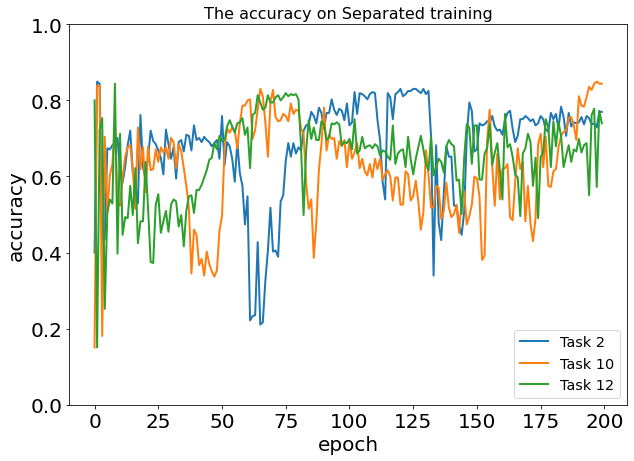

In [277]:

# plt.figure(figsize=(10, 7))
# plt.tick_params(axis='both', which='major', labelsize=20)

# #plt.title('Test accuracy over masked group', fontdict=dict(fontsize=16))
# plt.xlabel('epoch',  fontdict=dict(fontsize=20))
# plt.ylabel('accuracy', fontdict=dict(fontsize=20) )
# for i in range(1, 13):
#     f = open('images/hist_model4-train-by-task'+str(i)+'_train2.json')
#     data = json.load(f)
#     f.close()
    
#     val_acc = data['acc']
#     plt.plot(val_acc, label='Task '+str(i), linewidth=2)
# plt.legend(fontsize="x-large", loc='lower right')
# plt.show()


plt.figure(figsize=(10, 7))
plt.tick_params(axis='both', which='major', labelsize=20)

plt.title('The accuracy on Separated training', fontdict=dict(fontsize=16))
plt.xlabel('epoch',  fontdict=dict(fontsize=20))
plt.ylabel('accuracy', fontdict=dict(fontsize=20) )
plt.ylim((0, 1))
for i in [2, 10, 12]:
    f = open('images/archive_9.29.2021/hist_separated_train-by-task'+str(i)+'_train5.json')
    data = json.load(f)
    f.close()
    
    val_acc = data['val_acc']
    plt.plot(val_acc, label='Task '+str(i), linewidth=2)
plt.legend(fontsize="x-large", loc='lower right')
plt.show()

## Separated training results

	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
1	93.68 		75.22 		0.90 		0.85
2	97.80 		76.86 		0.96 		0.87
3	90.99 		70.96 		0.88 		0.81
4	99.17 		74.18 		0.98 		0.85
5	99.08 		77.30 		0.98 		0.87
6	93.38 		72.65 		0.89 		0.84
7	94.69 		71.45 		0.92 		0.82
8	99.34 		79.05 		0.99 		0.88
9	99.23 		79.43 		0.99 		0.88
10	98.97 		77.73 		0.98 		0.87
11	96.34 		73.91 		0.94 		0.84
12	97.74 		78.88 		0.96 		0.88


<BarContainer object of 12 artists>

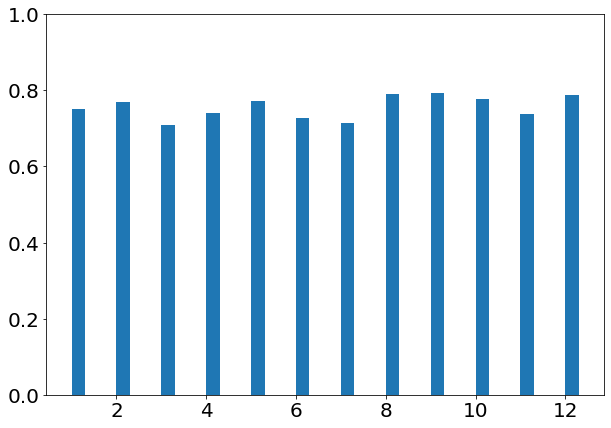

In [422]:
# summary the average accuracy and f1-score for separated training
print('\tacc-train \tacc-test(%) \tf1-train(avg) \tf1-test(avg)')

test_seperated_accuracies = []
train_accuracies = []
for i in range(1, 13):
    f = open('./images/acc_separated_train-by-task'+str(i)+'.json')
    dat = json.load(f)
    f.close()
    
    train_acc = np.array(dat['train_accuracy']).mean()
    test_acc = np.array(dat['test_accuracy']).mean()
    train_f1 = np.array(dat['train_f1_score']).mean()
    test_f1 = np.array(dat['test_f1_score_l0']).mean()
    
    test_seperated_accuracies.append(test_acc)
    train_accuracies.append(train_acc)
    print(f'%d\t%.2f \t\t%.2f \t\t%.2f \t\t%.2f'%(i, train_acc*100, test_acc*100, train_f1, test_f1 ))
    

tasks = [i for i in range(1, 13)]
plt.figure(figsize=(10, 7))
plt.ylim((0, 1))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.bar(np.array(range(1, 13))+0.15, test_seperated_accuracies, width=0.3)


## Masking training results (mean of 5 iterations)

MASKED_GROUP0
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	100.00 		82.51 		1.0000 		0.9024
	100.00 		81.69 		1.0000 		0.8948
	100.00 		81.69 		1.0000 		0.8974
	100.00 		78.63 		1.0000 		0.8793
	100.00 		83.29 		1.0000 		0.9060
	---------------------------------------------------------
	100.00 		81.56 		1.0000 		0.8960
MASKED_GROUP1
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	99.73 		83.33 		0.9984 		0.9074
	99.73 		78.96 		0.9984 		0.8776
	99.86 		79.51 		0.9992 		0.8837
	99.86 		80.00 		0.9992 		0.8885
	100.00 		80.55 		1.0000 		0.8892
	---------------------------------------------------------
	99.84 		80.47 		0.9990 		0.8893
MASKED_GROUP2
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	99.93 		83.33 		0.9996 		0.9072
	99.66 		80.60 		0.9980 		0.8906
	99.66 		78.69 		0.9980 		0.8789
	99.66 		80.55 		0.9980 		0.8909
	100.00 		82.19 		1.0000 		0.8995
	---------------------------------------------------------
	99.78 		81.07 		0.9987 		0.8934
MASKED_GROUP3
	acc-t

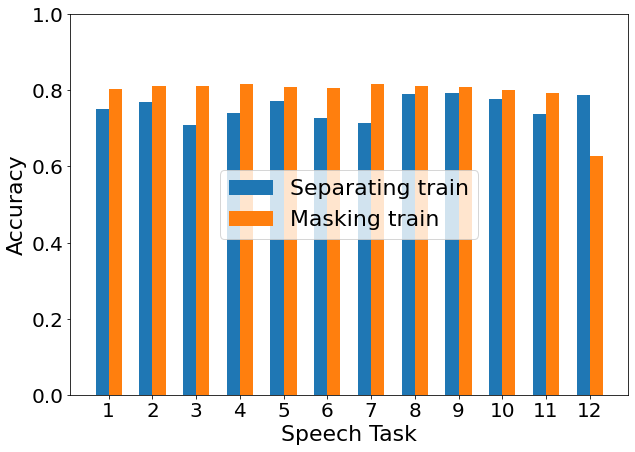

In [427]:
import json

#print(test_seperated_accuracies)
# 
#f = open('model4-masking-200ep_results.json',)
#f = open('model4-1group-masked-200ep_results.json',)
#f = open('images/acc_model4_masked_1group.json')
#f = open('images/archive_9.29.2021/acc_masking_train_masked_1group.json')
f = open('images/acc_masking_train_masked_1group.json')

data = json.load(f)
# Closing file
f.close()

MASKED_GROUPS = ['masked_group'+str(i) for i in range(0, 13)]

test_masked_accuracies = []
test_masked_f1 = []
for g in MASKED_GROUPS:
    print(g.upper())
    print('\tacc-train \tacc-test(%) \tf1-train(avg) \tf1-test(avg)')
    
    mean_acc_train, mean_acc_test = 0, 0
    mean_f1_train, mean_f1_test = 0, 0
    for i in range(1, 6):  #train1 - train5
        dat = data['Train-'+str(i)][g]
        accuracy = dat['Accuracy (train,test)']
        train_f1 = dat['Train f1-score(l0,l1,mean)']
        test_f1 = dat['Test f1-score(l0,l1,mean)']
        print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(accuracy[0], accuracy[1], train_f1[0], test_f1[0]))
        
        mean_acc_train += accuracy[0]
        mean_acc_test += accuracy[1]
        mean_f1_train += train_f1[0]
        mean_f1_test += test_f1[0]
    
    
    print('\t---------------------------------------------------------')
    print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(mean_acc_train/5, mean_acc_test/5, mean_f1_train/5, mean_f1_test/5))

    if g != 'masked_group0':
        test_masked_accuracies.append(mean_acc_test/5) 
        test_masked_f1.append(mean_f1_test/5)

print('\n\n\n------ Masking Train accuracy & f1 ----- (test)')
i=0
for acc in test_masked_accuracies:
    i+=1
    print(f'%d \t %.2f \t\t%.3f'%(i, acc, test_masked_f1[i-1]))
    
x_axis = [i for i in range(1, 13)]
plt.figure(figsize=(10, 7))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylim((0, 1))
plt.xlabel('Speech Task', fontdict=dict(fontsize=22))
plt.ylabel('Accuracy', fontdict=dict(fontsize=22))
plt.xticks(x_axis)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.bar(np.array(range(1, 13))-0.15, test_seperated_accuracies, width=0.3)
plt.bar(np.array(range(1, 13))+0.15, np.array(test_masked_accuracies)/100, width=0.3)
plt.legend(['Separating train', 'Masking train'],  loc='center', prop={'size': 22})




In [265]:
RESPONSE_GROUPS = [[],  # this means all of responses
                   ['response1'],  # task 1 (Mic test)
                   ['response2'],  # task 2 (Free speech)
                   ['response3'],  # task 3 (picture description)
                   ['response4'],  # task 4 (category naming - give name of animals/tools/fruits/household)
                   ['response5'],  # task 5 (list all words begin with letter ?)
                   ['response6'],  # task 6 (Phonetically-balanced paragraph reading)
                   ['response7'],  # task 7 (say /aaa/)
                   ['response8', 'response9'],  # task 8 (pa-pa-pa; puh-tuh-kuh)
                   # ['response9'],  # task 9 (pa-ta-ka)
                   ['response' + str(i) for i in range(10, 34)], # task 8 (Confrontational naming)
                   ['response' + str(i) for i in range(35, 44)], # task 9 (non-word)
                   ['response46', 'response48'],                 # task 10 (sentence repeat)
                   ['response49', 'response50']                  # task 11 Self report (medication information)
                   ]


print(len(RESPONSE_GROUPS))

13
